In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
from wordcloud import WordCloud

In [12]:
# 📥 Step 1: Load Data
import pandas as pd
df = pd.read_csv("Reviews.csv")
df = df[['Score','Text']].dropna()
df = df[df['Score'] != 3 ]
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')

In [18]:
# 🧹 Step 2: Text Cleaning
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['CleanText'] = df['Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naufi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# ☁️ Step 3: WordCloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

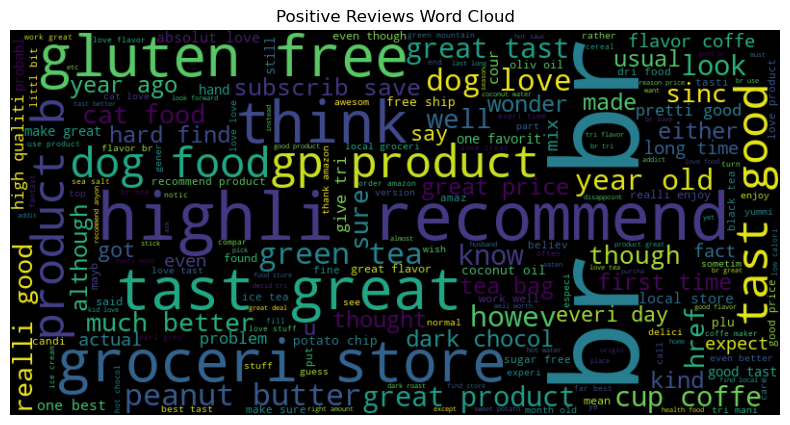

In [42]:
# Positive reviews
wc_pos = WordCloud(width=800, height=400).generate(' '.join(df[df['Sentiment'] == 'positive']['CleanText']))
plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()

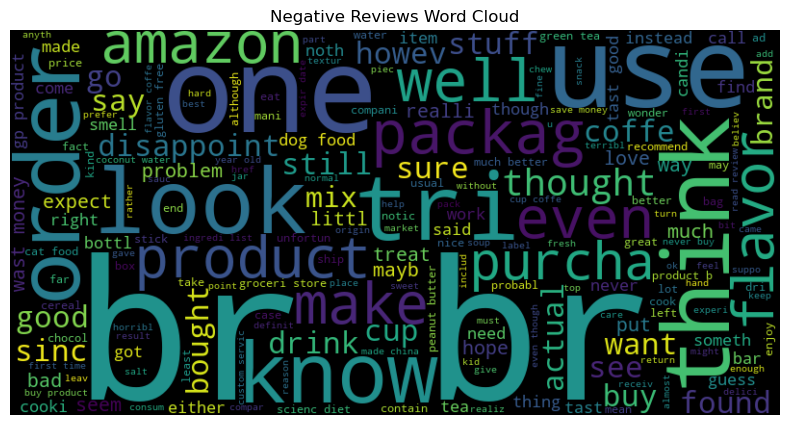

In [24]:
# Negative reviews
wc_neg = WordCloud(width=800, height=400).generate(' '.join(df[df['Sentiment'] == 'negative']['CleanText']))
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()

In [30]:
# 🤖 Step 4: Naive Bayes Sentiment Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = df['CleanText']
y = df['Sentiment']

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    negative       0.70      0.69      0.70     16379
    positive       0.94      0.95      0.94     88784

    accuracy                           0.91    105163
   macro avg       0.82      0.82      0.82    105163
weighted avg       0.91      0.91      0.91    105163



ImportError: cannot import name 'Confusion' from 'sklearn.metrics' (C:\Users\naufi\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

ImportError: cannot import name 'Confusion' from 'sklearn.metrics' (C:\Users\naufi\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

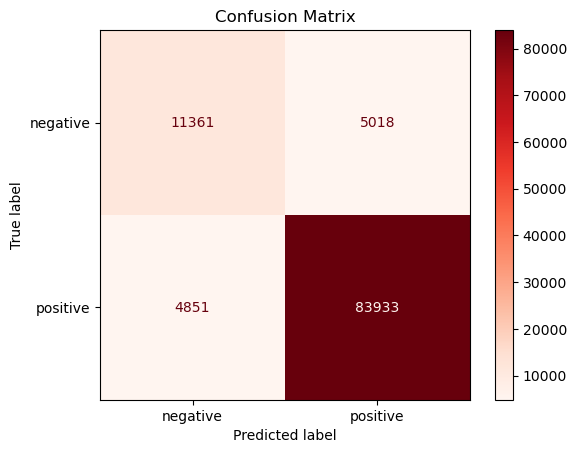

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have your true labels and predicted labels:
# y_test = [...]  # true labels from your test set
# y_pred = [...]  # predictions from your model

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])

# Plot it
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()